# 유무임승차 그래프 표시

In [28]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = r'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('시간대별.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

mx = [0] * 15
mx_station = [''] * 15
for row in data:
    row[4:] = map(int, row[4:]) # 들어오는 값을 모두 int로 변환
    for j in range(15):
        a = row[j*2+4]
        if a > mx[j]:
            mx[j] = a
            mx_station[j] = row[3]
            
for i in range(15):
    print('시간 : {}시, 인원 : {}, 역 : {}'.format((i+4)%24,mx[i], mx_station[i]))

시간 : 4시, 인원 : 9900, 역 : 구로
시간 : 5시, 인원 : 35115, 역 : 신림
시간 : 6시, 인원 : 69965, 역 : 신림
시간 : 7시, 인원 : 181795, 역 : 신림
시간 : 8시, 인원 : 280991, 역 : 신림
시간 : 9시, 인원 : 165255, 역 : 신림
시간 : 10시, 인원 : 86565, 역 : 신림
시간 : 11시, 인원 : 72077, 역 : 신림
시간 : 12시, 인원 : 77782, 역 : 신림
시간 : 13시, 인원 : 86853, 역 : 강남
시간 : 14시, 인원 : 96497, 역 : 강남
시간 : 15시, 인원 : 119346, 역 : 강남
시간 : 16시, 인원 : 136106, 역 : 강남
시간 : 17시, 인원 : 201018, 역 : 강남
시간 : 18시, 인원 : 281548, 역 : 강남


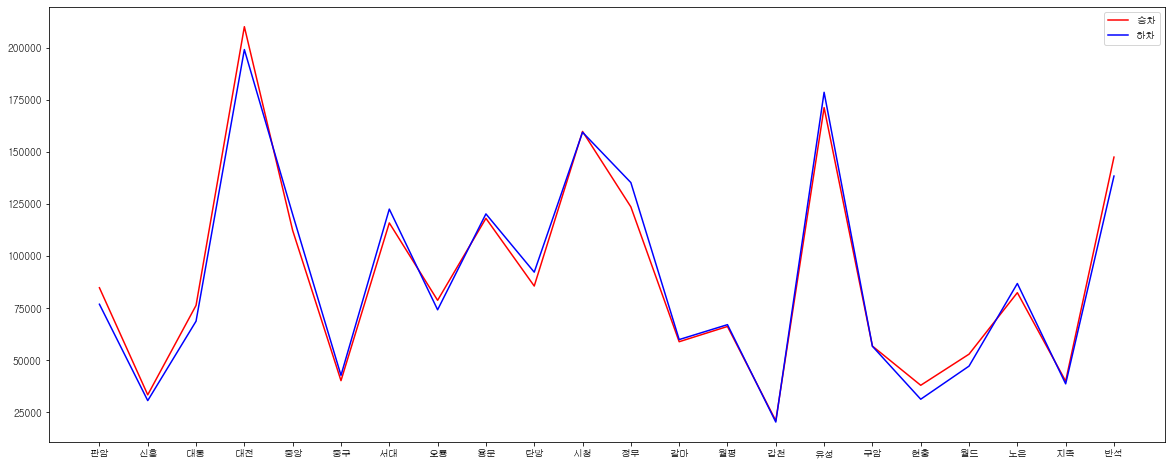

In [61]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = r'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('대전승하차인원.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)
# 대전 2022년 2월 지하철 역별 승하차 인원에 대한 그래프
# 가장 많은 승차인원에 해당하는 역 찾기
# 가장 많은 하차인원에 해당하는 역 찾기
# 기간대별 승하차인원 그래프
# 일자별 승하차 인원 그래프

station = {}
for row in data:
    if row[0][5:7] == '02':
        if (row[2]+row[3]) in station:
            a = 0
            for i in range(4,28):
                a += int(row[i])
            station[row[2]+row[3]] += a
        else:
            a = 0
            for i in range(4,28):
                a += int(row[i])
            station[row[2]+row[3]] = a
dur = []            
rides = []
quits = []
for key, value in station.items():
    if key[0:2] not in dur:
        dur.append(key[0:2])
    if '승차' in key:
        rides.append(value)
    else:
        quits.append(value)

plt.figure(figsize=(20,8))
plt.plot(dur, rides, label = '승차', c='r')
plt.plot(dur, quits, label = '하차', c='b')
plt.legend()
plt.show()

In [72]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = r'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('대전승하차인원.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)
# 가장 많은 승차인원에 해당하는 역 찾기
# 가장 많은 하차인원에 해당하는 역 찾기
# 기간대별 승하차인원 그래프
# 일자별 승하차 인원 그래프

mx_station = ''
mx = 0
mi_staion = ''
mi = 0
for row in data:
    if row[3] == '승차':
        a = 0
        for i in range(4,28):
            a += int(row[i])
            if a > mx:
                mx = a
                mx_station = row[2]
    if row[3] == '하차':
        a = 0
        for i in range(4,28):
            a += int(row[i])
            if a > mi:
                mi = a
                mi_station = row[2]
                
print("가장 많은 인원이 승차하는 역은 {}역이며 {}명의 인원이 승차합니다.".format(mx_station,mx))
print("가장 많은 인원에 하차하는 역은 {}역이며 {}명의 인원이 하차합니다.".format(mi_station,mi))

가장 많은 인원이 승차하는 역은 대전역이며 9838명의 인원이 승차합니다.
가장 많은 인원에 하차하는 역은 대전역이며 10941명의 인원이 하차합니다.


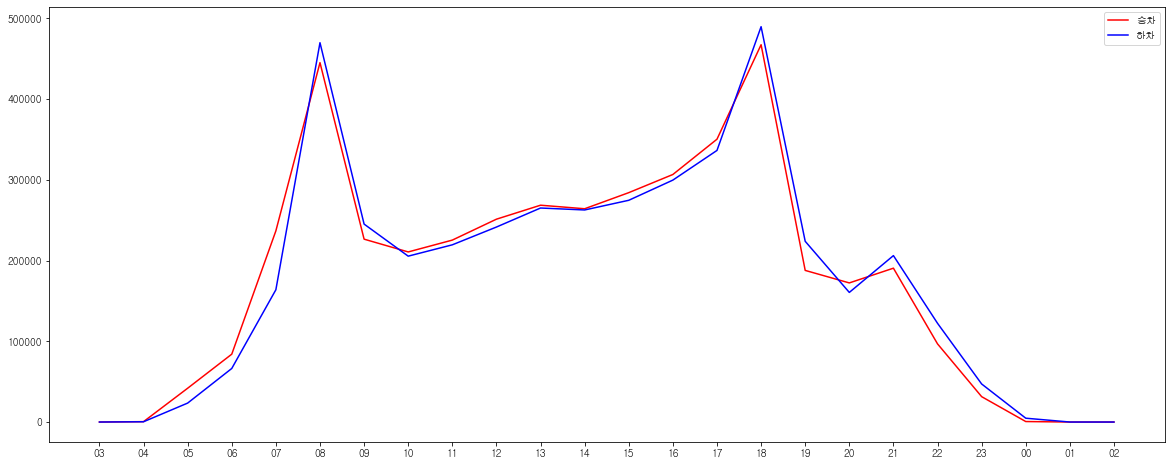

In [125]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = r'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('대전승하차인원.csv', 'r', encoding='cp949')
data = csv.reader(f)

# 기간대별 승하차인원 그래프


time = {}
times = []
count = 0
for row in data:
    for times2 in row:
        if count > 3:
            times.append(times2[0:2])
            time[times2[0:2]] = [0,0]
        count += 1
    break

for row in data:
    if '승차' in row[3]:
        for i in range(4, 28):
            time[times[i-4]][0] += int(row[i])
    else:
        for i in range(4, 28):
            time[times[i-4]][1] += int(row[i])

dur = []            
rides = []
quits = []
for key, value in  time.items():
    if key not in dur:
        dur.append(key)
    rides.append(value[0])
    quits.append(value[1])

plt.figure(figsize=(20,8))
plt.plot(dur, rides, label = '승차', c='r')
plt.plot(dur, quits, label = '하차', c='b')
plt.legend()
plt.show()

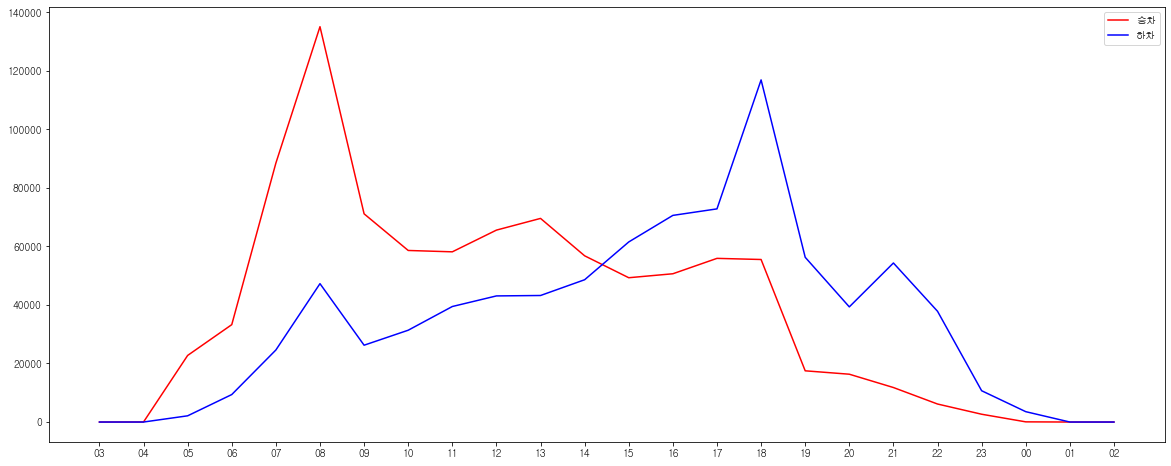

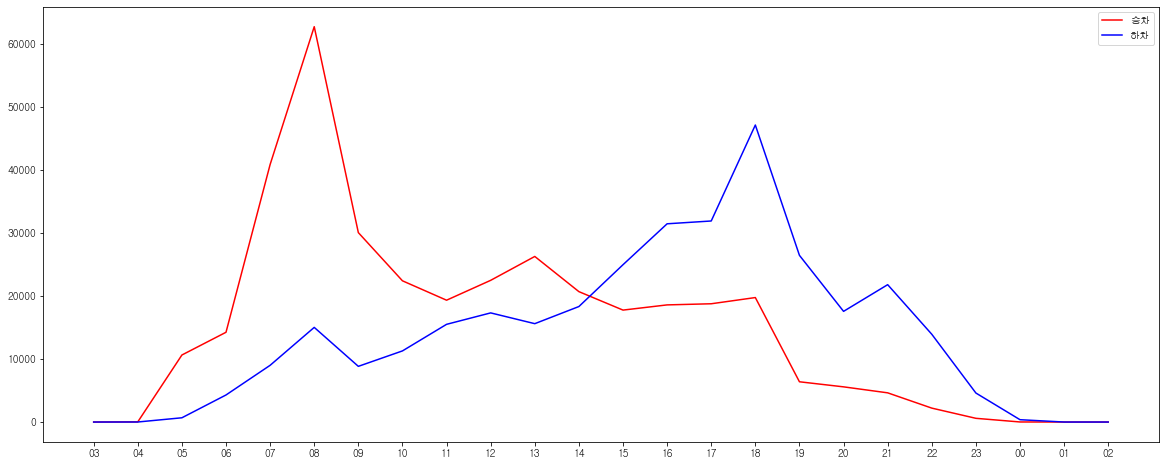

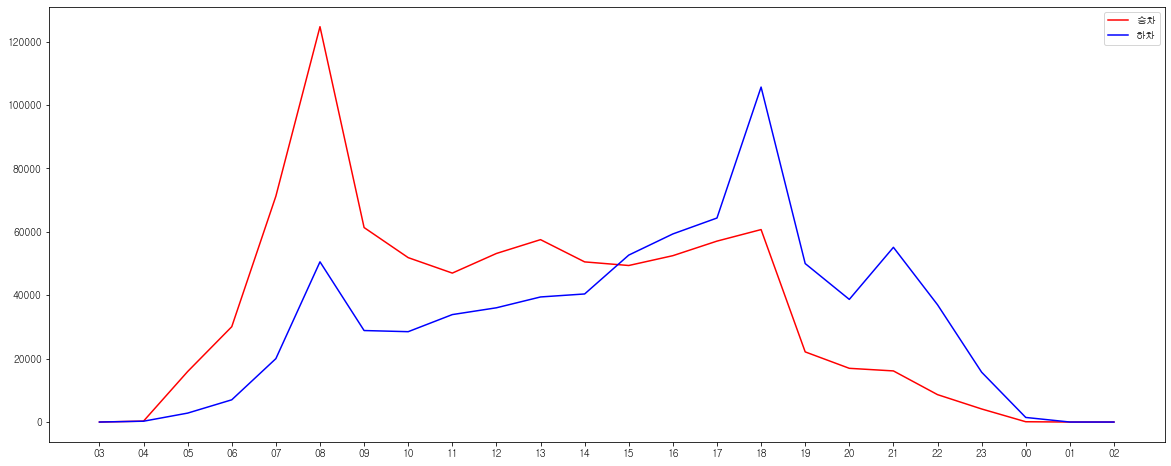

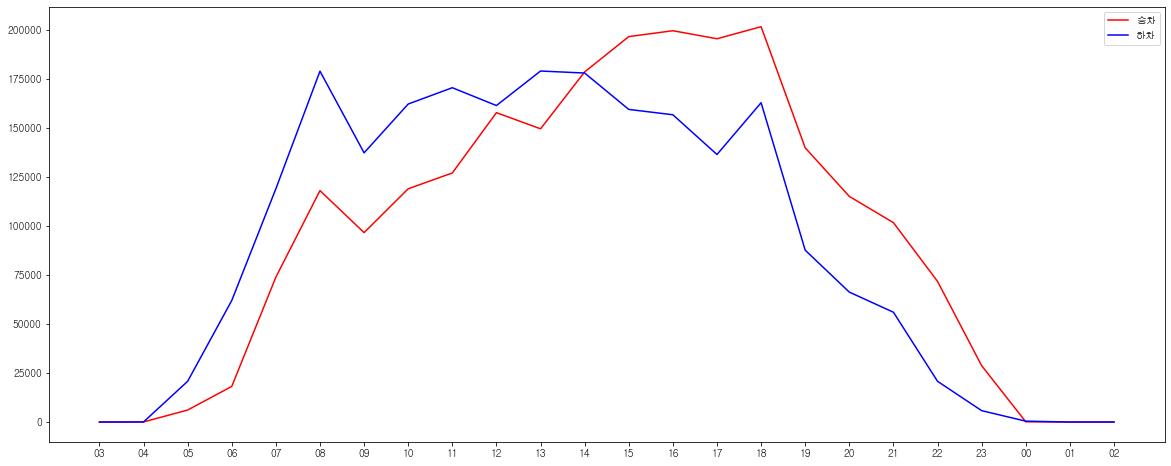

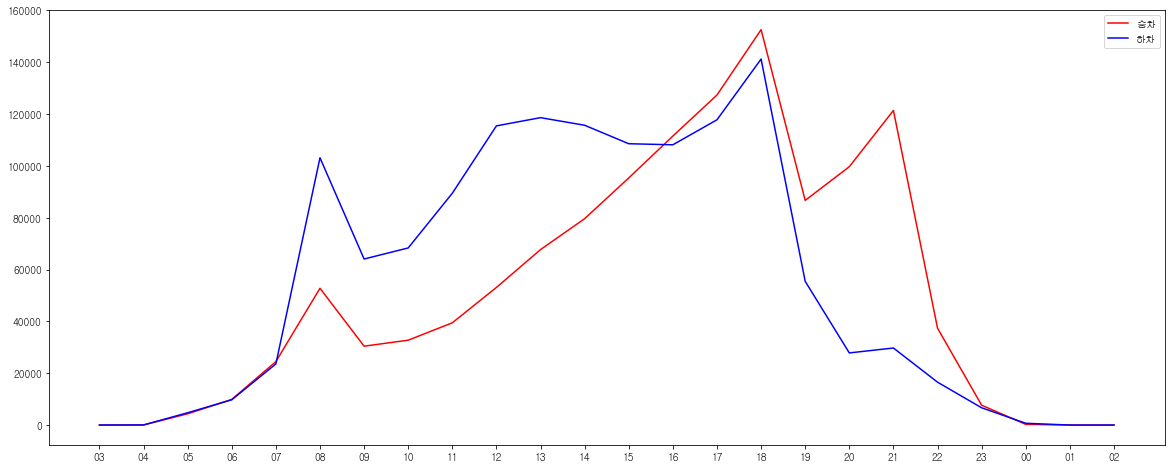

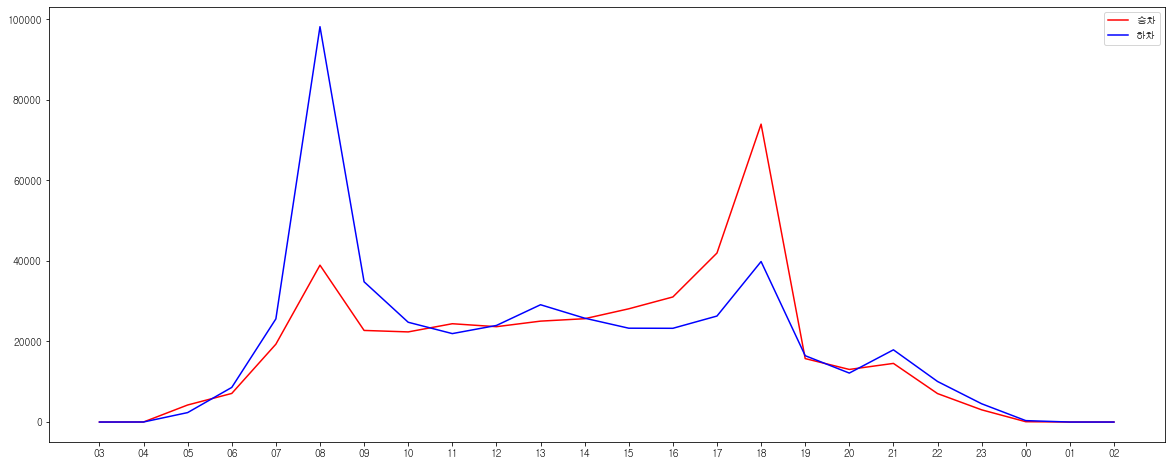

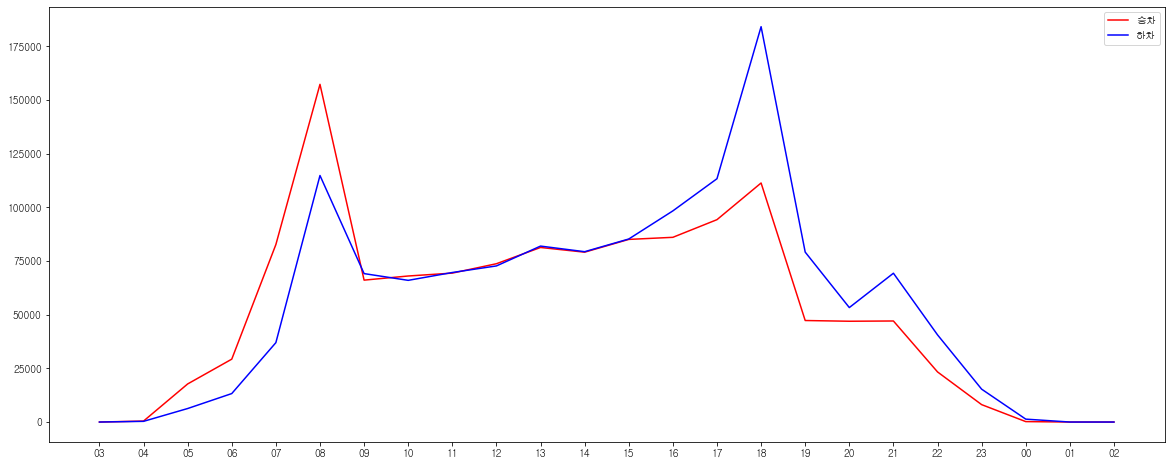

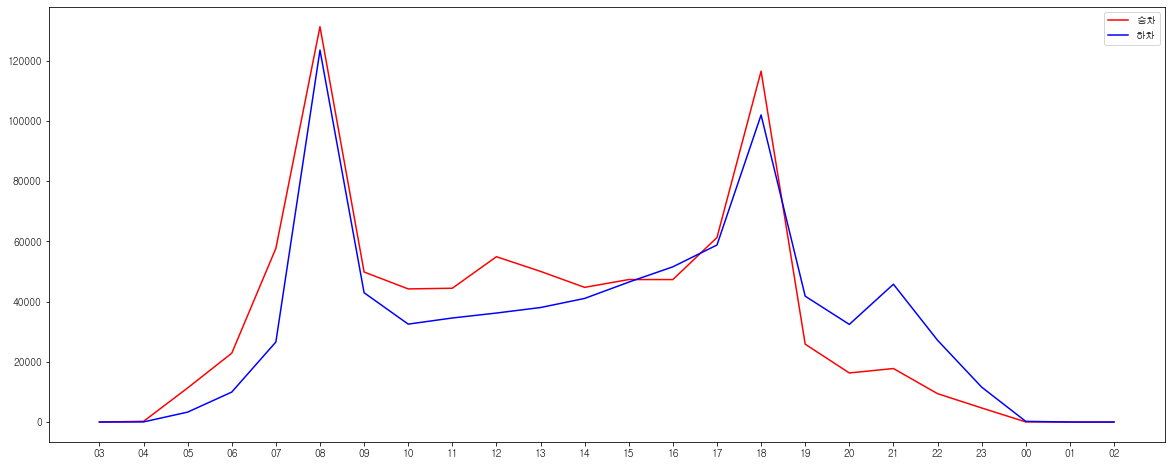

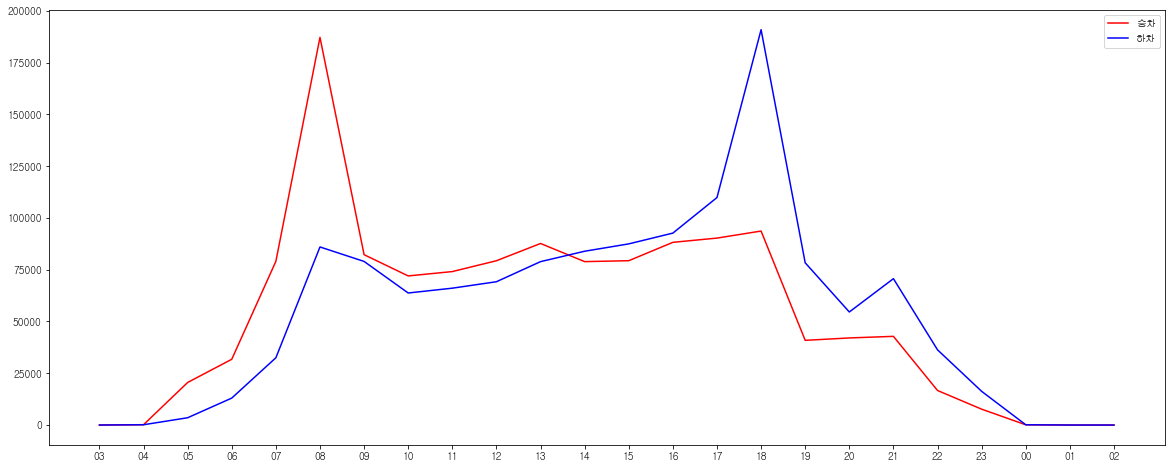

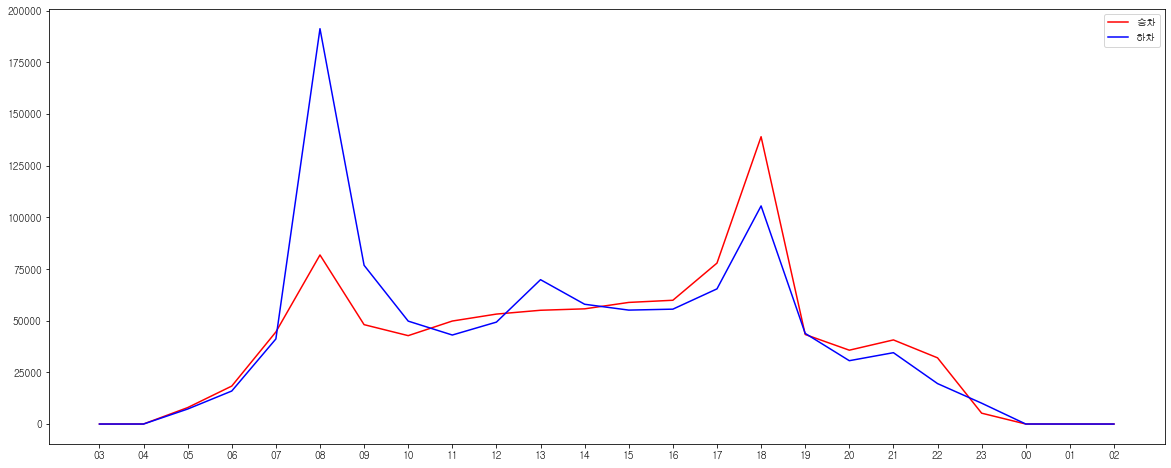

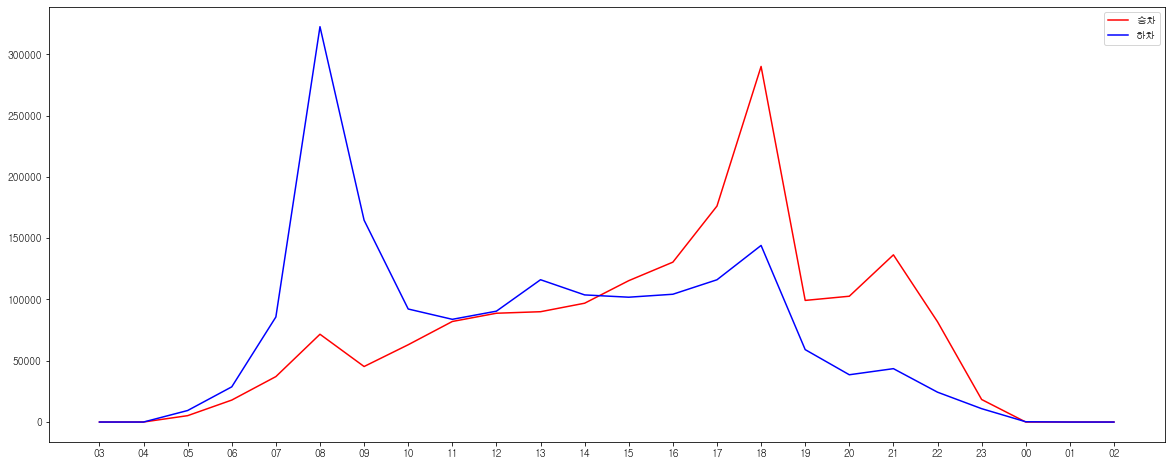

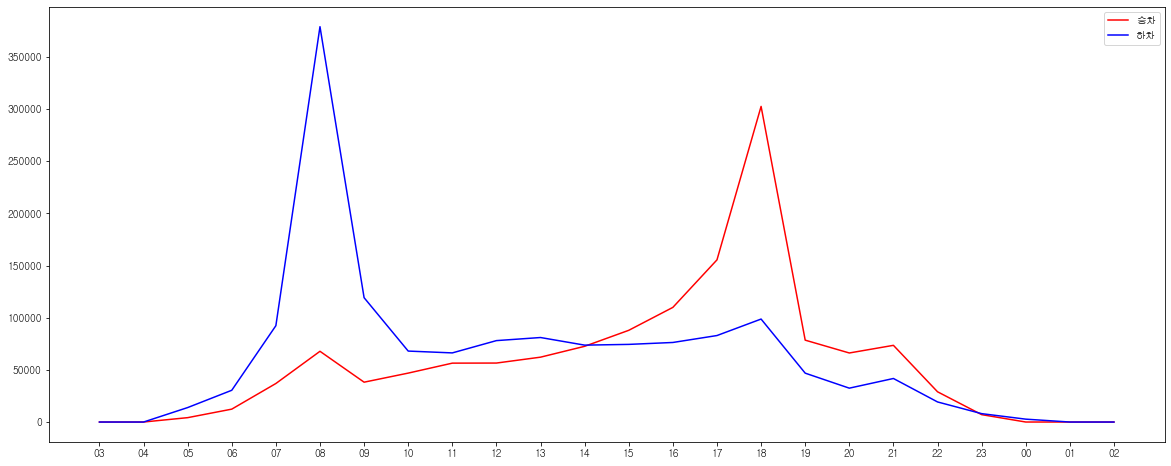

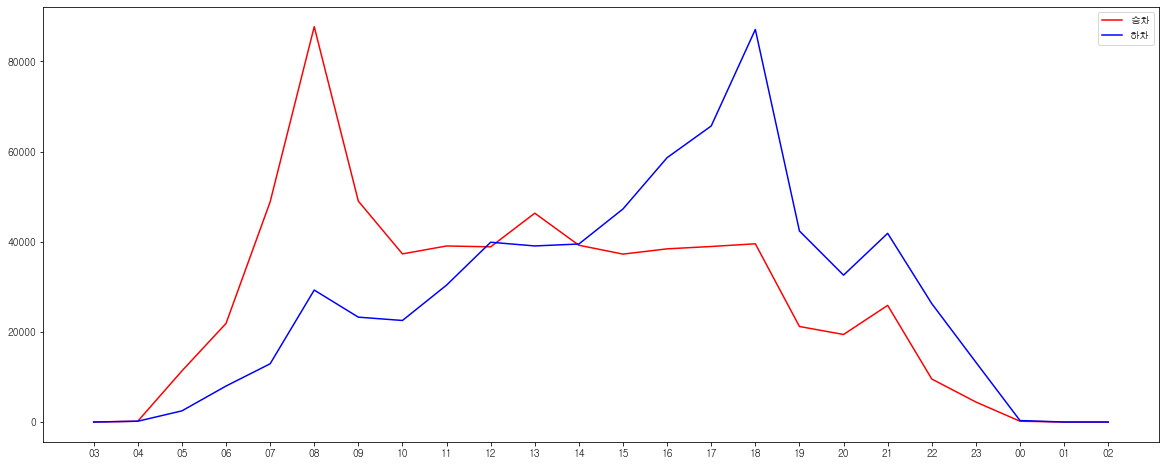

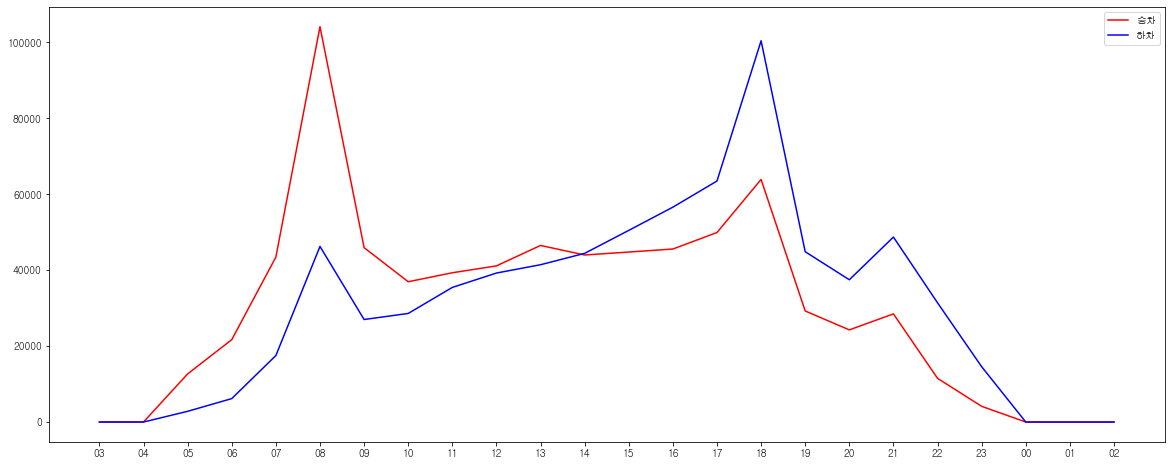

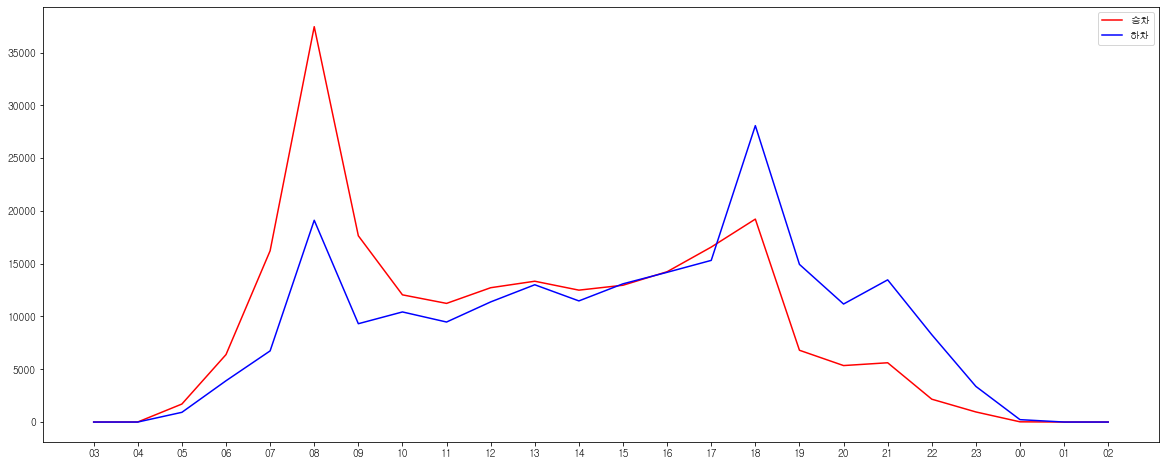

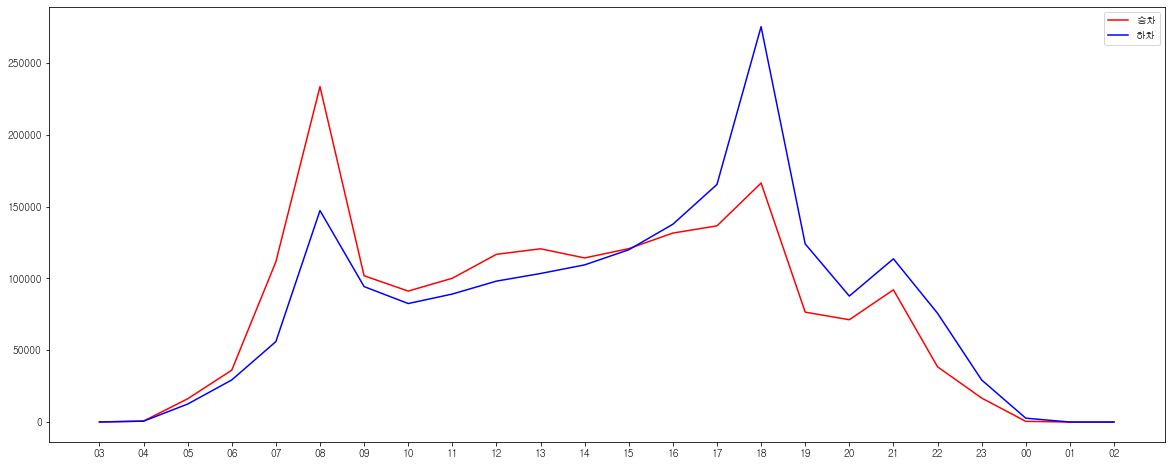

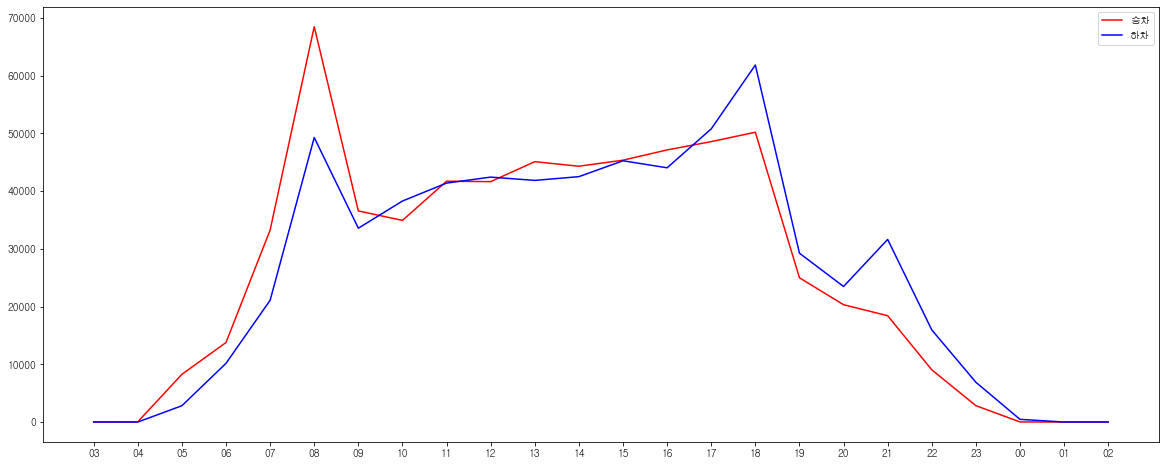

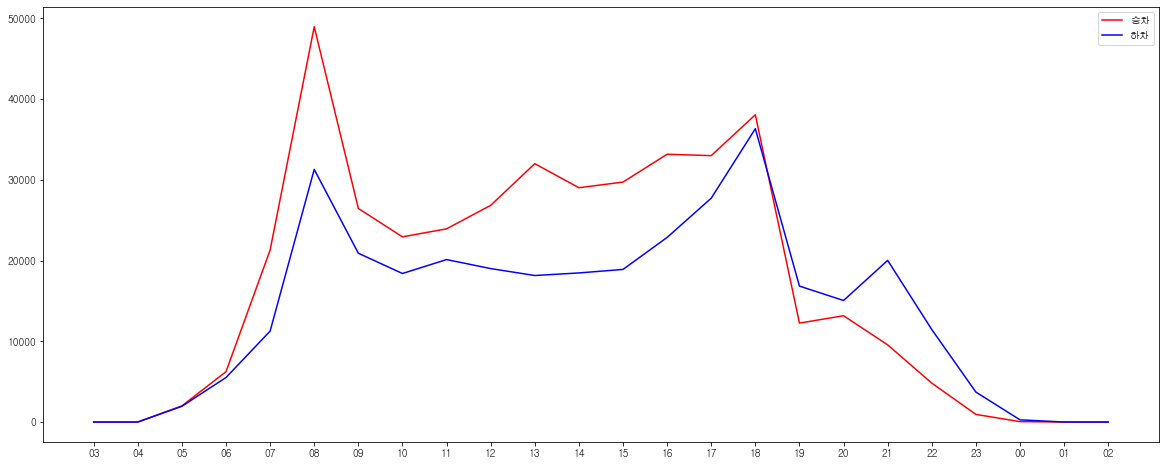

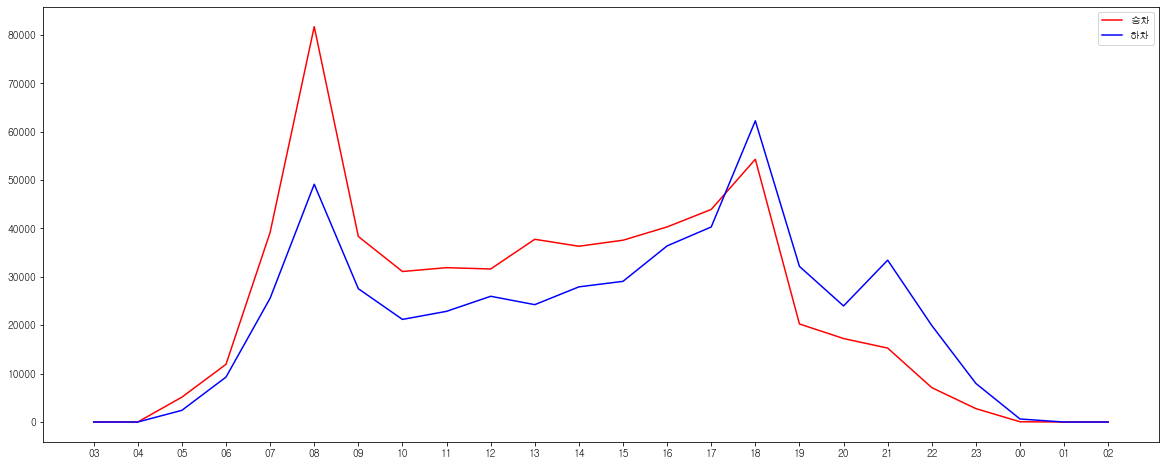

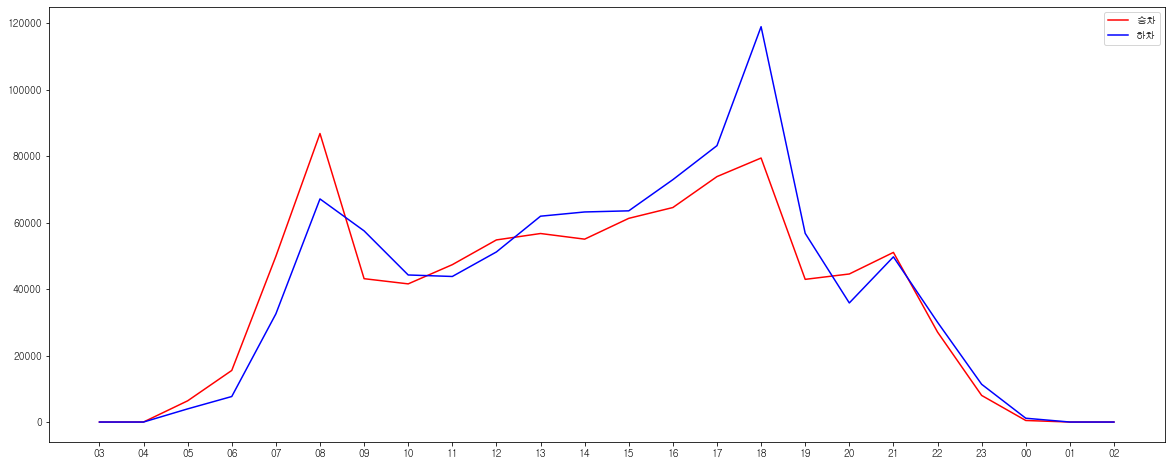

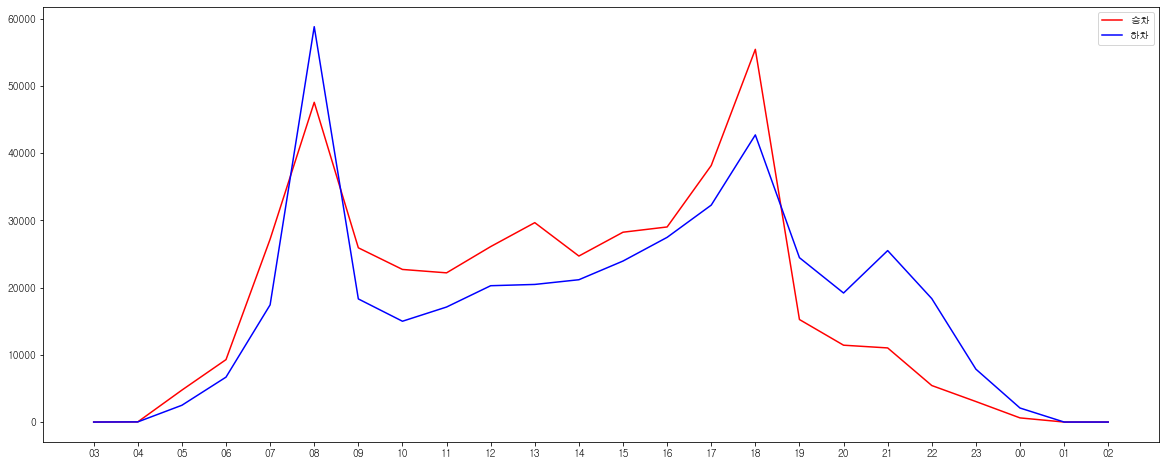

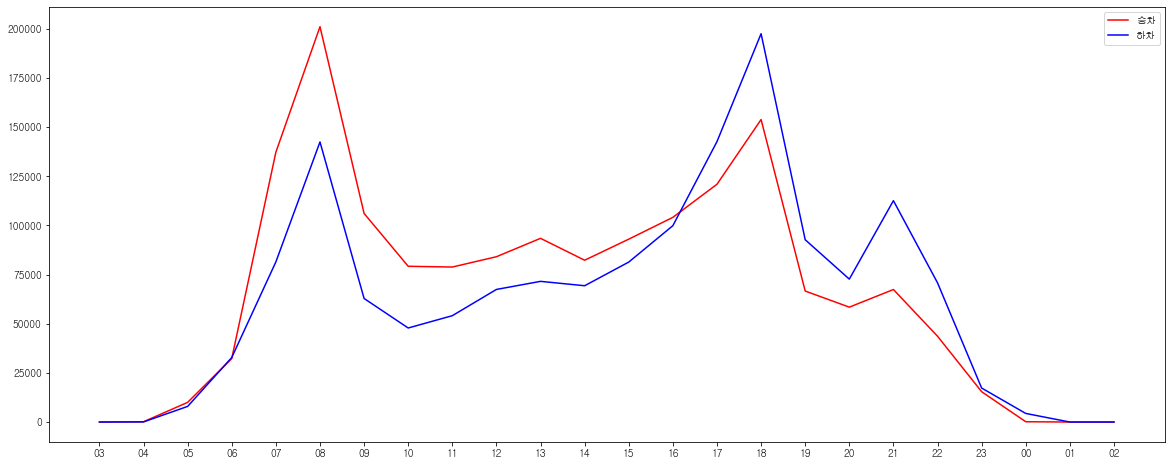

In [36]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = r'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('대전승하차인원.csv', 'r', encoding='cp949')
data = csv.reader(f)

# 기간대별 승하차인원 그래프


time = {}
times = []
count = 0
for row in data:
    for times2 in row:
        if count > 3:
            times.append(times2[0:2])
            time[times2[0:2]] = [0,0]
        count += 1
    break

for row in data:
    if row[2] in station:
        if '승차' in row[3]:
            for i in range(4, 28):
                station[row[2]][times[i-4]][0] += int(row[i])
        if '하차' in row[3]:
            for i in range(4, 28):
                station[row[2]][times[i-4]][1] += int(row[i])
    else:
        station[row[2]] = {}
        for i in range(4, 28):
            station[row[2]][times[i-4]] = [0,0]
            station[row[2]][times[i-4]][0] += int(row[i])
        


for key, value in station.items():
    dur = []            
    rides = []
    quits = []
    for key2, value2 in value.items():
        dur.append(key2)
        rides.append(value2[0])
        quits.append(value2[1])
        
    plt.figure(figsize=(20,8))
    plt.plot(dur, rides, label = '승차', c='r')
    plt.plot(dur, quits, label = '하차', c='b')
    plt.legend()
    plt.show()

In [38]:
%matplotlib inline
# %matplotlib tk
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = r'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('대전승하차인원.csv', 'r', encoding='cp949')
data = csv.reader(f)

# 일자별 승하차 인원 그래프

next(data)

time = {}
for row in data:
    if row[0] in time:
        a = 0
        for i in range(4,28):
            a += int(row[i])
        if '하차' in row[3]:
            time[row[0]][1] += a 
        else:
            time[row[0]][0] += a 
    else:
        a = 0
        for i in range(4,28):
            a += int(row[i])
        time[row[0]] = [a, 0]

print(time)
dur = []            
rides = []
quits = []
count = 0
for key, value in  time.items():
    if count < 10:
        dur.append(key)
        rides.append(value[0])
        quits.append(value[1])
    count += 1
plt.figure(figsize=(20,8))
plt.plot(dur, rides, label = '승차', c='r')
plt.plot(dur, quits, label = '하차', c='b')
plt.legend()
plt.savefig('대전지하철.png')
plt.show()

{'2022-01-01': [40367, 40214], '2022-01-02': [44609, 44463], '2022-01-03': [86402, 86144], '2022-01-04': [88909, 88657], '2022-01-05': [86809, 86533], '2022-01-06': [89286, 89020], '2022-01-07': [95671, 95366], '2022-01-08': [65181, 64953], '2022-01-09': [49059, 48902], '2022-01-10': [90308, 90058], '2022-01-11': [88914, 88646], '2022-01-12': [87077, 86783], '2022-01-13': [89812, 89538], '2022-01-14': [96812, 96479], '2022-01-15': [65646, 65412], '2022-01-16': [47575, 47440], '2022-01-17': [89312, 89019], '2022-01-18': [89657, 89369], '2022-01-19': [93655, 93335], '2022-01-20': [90732, 90428], '2022-01-21': [97213, 96890], '2022-01-22': [67126, 66842], '2022-01-23': [48750, 48586], '2022-01-24': [92736, 92446], '2022-01-25': [88374, 88086], '2022-01-26': [90990, 90702], '2022-01-27': [91013, 90709], '2022-01-28': [91394, 91078], '2022-01-29': [57642, 57443], '2022-01-30': [39991, 39853], '2022-01-31': [29553, 29439], '2022-02-01': [23179, 23109], '2022-02-02': [36173, 36049], '2022-02-